In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import os
import time
import requests
import gdown
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
train_data=pd.read_csv('simulation5.csv') #('simulation_train_data.csv')
train_data.head()

,Destination Port,Flow Duration,Total Length of Fwd Packets,Label
0,62179,0.000000,66,attack
1,80,0.183655,66,attack
2,62179,0.183794,60,attack
3,0,0.186751,365,attack
4,80,0.365907,60,attack


In [ ]:
train_data.describe(include='object')

,Label
count,16296
unique,2
top,BENIGN
freq,8511


In [ ]:
train_data.isnull().sum()

Destination Port               0
Flow Duration                  0
Total Length of Fwd Packets    0
 Label                         0
dtype: int64

In [ ]:
total = train_data.shape[0]
missing_columns = [col for col in train_data.columns if train_data[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train_data[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16296 entries, 0 to 16295
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination Port             16296 non-null  int64  
 1   Flow Duration                16296 non-null  float64
 2   Total Length of Fwd Packets  16296 non-null  int64  
 3    Label                       16296 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 509.4+ KB


In [ ]:
print(f"Number of duplicate rows: {train_data.duplicated().sum()}")

Number of duplicate rows: 108


In [ ]:
train_data = train_data.drop_duplicates(keep='first')

In [ ]:
print(f"Number of duplicate rows: {train_data.duplicated().sum()}")

Number of duplicate rows: 0


In [ ]:
print('Class distribution Training set:')
print(train_data[' Label'].value_counts())

Class distribution Training set:
 Label
BENIGN    8443
attack    7745
Name: count, dtype: int64


In [ ]:
column_names = train_data.columns.tolist()
print(column_names)

['Destination Port', 'Flow Duration', 'Total Length of Fwd Packets', ' Label']


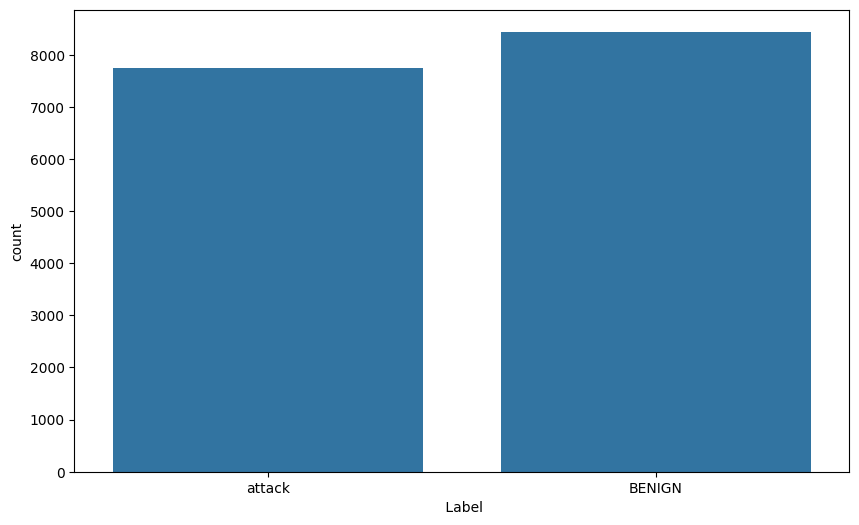

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=train_data[' Label']) #original
plt.show()

In [ ]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train_data)
#le(test_data)

In [ ]:
print('Class distribution Training set:')
print(train_data[' Label'].value_counts())

Class distribution Training set:
 Label
0    8443
1    7745
Name: count, dtype: int64


In [ ]:
train_data.dropna(subset=[' Label'])

,Destination Port,Flow Duration,Total Length of Fwd Packets,Label
0,62179,0.000000,66,1
1,80,0.183655,66,1
2,62179,0.183794,60,1
3,0,0.186751,365,1
4,80,0.365907,60,1
...,...,...,...,...
16291,443,22745.826730,66,1
16292,443,22746.027350,60,1
16293,0,22746.028360,1356,1
16294,0,22746.233870,296,1


In [ ]:
print('Class distribution Training set:')
print(train_data[' Label'].value_counts())

Class distribution Training set:
 Label
0    8443
1    7745
Name: count, dtype: int64


In [ ]:
nan_columns = train_data.columns[train_data.isna().any()].tolist()

In [ ]:
if len(nan_columns) > 0:
    print("Columns with NaN values:")
    for column in nan_columns:
        print(column)
else:
    print("No columns have NaN values.")

No columns have NaN values.


In [ ]:
train_data.fillna(0, inplace=True)
#test_data.fillna(0, inplace=True)

In [ ]:
train_data.replace([np.inf, -np.inf], 0, inplace=True)
#test_data.replace([np.inf, -np.inf], 0, inplace=True)

In [ ]:
print('Class distribution Training set:')
print(train_data[' Label'].value_counts())

Class distribution Training set:
 Label
0    8443
1    7745
Name: count, dtype: int64


In [ ]:
print('Class distribution Training set:')
#print(test_data[' Label'].value_counts())

Class distribution Training set:


# Random Forest

In [ ]:
X = train_data.drop([' Label'], axis=1)
y = train_data[' Label']
#X_train = train_data.drop([' Label'], axis=1)
#y_train = train_data[' Label']
#X_test = test_data.drop([' Label'], axis=1)
#y_test = test_data[' Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
#rf_classifier = RandomForestClassifier(random_state=42) # rosay et all usa n_estimators=100 , numero de trees.
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred1 = rf_classifier.predict(X_train)

In [ ]:
accuracy = accuracy_score(y_train, y_pred1)
print(f'Accuracy Train: {accuracy:.2f}')
std_deviation = np.std([accuracy])
print(f'Std Deviation Train: {std_deviation:.2f}')

Accuracy Train: 1.00
Std Deviation Train: 0.00


In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy TEST: {accuracy:.2f}')
std_deviation = np.std([accuracy])
print(f'Std Deviation Test: {std_deviation:.2f}')

Accuracy TEST: 0.96
Std Deviation Test: 0.00


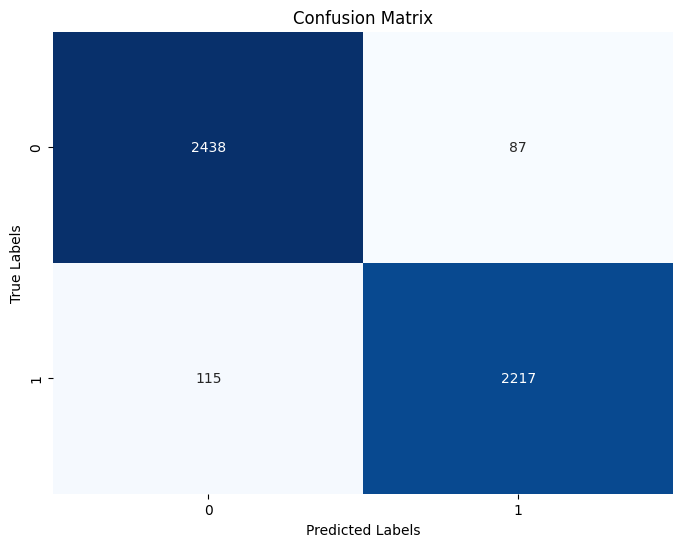

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#validar porcentagem se todos os valores qu existem desta classe se estão sendo previstar como elas mesmo.


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2525
           1       0.96      0.95      0.96      2332

    accuracy                           0.96      4857
   macro avg       0.96      0.96      0.96      4857
weighted avg       0.96      0.96      0.96      4857



# KNN

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=3) #rosay et all k=5; # mudar parametros de K (3,5,7,9,11,13,15) Após achar o melhor K, executa o k-folds k-10

In [ ]:
knn_classifier.fit(X_train, y_train) # k = 3 foi o melhor resultado

KNeighborsClassifier(n_neighbors=3)

In [ ]:
X_train = train_data.drop([' Label'], axis=1)
y_train = train_data[' Label']
#X_test = test_data.drop([' Label'], axis=1)
#y_test = test_data[' Label']

In [ ]:
y_pred_train = knn_classifier.predict(X_train)

In [ ]:
# Accuracy TRAIN
accuracy = accuracy_score(y_train, y_pred_train)
print(f'Accuracy TRAIN: {accuracy}')
std_deviation = np.std([accuracy])
print(f'Std Deviation Train: {std_deviation:.2f}')

Accuracy TRAIN: 0.9279095626389918
Std Deviation Train: 0.00


In [ ]:
y_pred_test = knn_classifier.predict(X_test)

In [ ]:
# Accuracy TEST
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy TEST: {accuracy}')
std_deviation = np.std([accuracy])
print(f'Std Deviation Test: {std_deviation:.2f}')

Accuracy TEST: 0.8877908173769816
Std Deviation Test: 0.00


              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2525
           1       0.90      0.86      0.88      2332

    accuracy                           0.89      4857
   macro avg       0.89      0.89      0.89      4857
weighted avg       0.89      0.89      0.89      4857



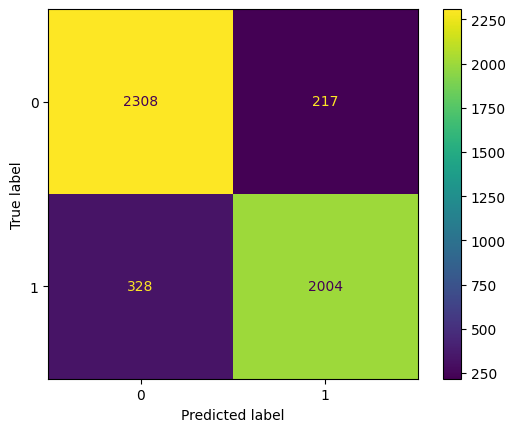

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(y_test, y_pred_test))

# MLP Sequential Mode

In [ ]:
X_train = train_data.drop([' Label'], axis=1)
y_train = train_data[' Label']
#X_test = test_data.drop([' Label'], axis=1)
#y_test = test_data[' Label']


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
input_dim = train_data.shape[1] - 1  # Subtract 1 to exclude the target variable
print(input_dim)

3


In [ ]:
model = keras.Sequential([
    layers.Input(shape=(3)),#input_dim=3
    layers.Dense(66, activation='sigmoid', kernel_initializer='lecun_normal'),
    layers.Dense(33, activation='sigmoid', kernel_initializer='lecun_normal'),
    layers.Dense(1, activation='sigmoid') #sigmoid 1
])
# rosay et all usa duas camadas de 256 nós e 14 nós de saida (nó é um neuronio)
#camadas densas do RNA
#softmax

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 66)                264       
                                                                 
 dense_1 (Dense)             (None, 33)                2211      
                                                                 
 dense_2 (Dense)             (None, 1)                 34        
                                                                 
Total params: 2509 (9.80 KB)
Trainable params: 2509 (9.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=125, batch_size=32, validation_data=(X_test, y_test)) # rosay et all --> 25 epochs, 32 instances , sugetsão aumetra eposchs para 100

Epoch 1/125
506/506 [==============================] - 4s 3ms/step - loss: 0.6603 - accuracy: 0.6279 - val_loss: 0.6385 - val_accuracy: 0.6566
Epoch 2/125
506/506 [==============================] - 2s 3ms/step - loss: 0.6466 - accuracy: 0.6427 - val_loss: 0.6324 - val_accuracy: 0.6570
Epoch 3/125
506/506 [==============================] - 2s 3ms/step - loss: 0.6349 - accuracy: 0.6447 - val_loss: 0.6340 - val_accuracy: 0.6576
Epoch 4/125
506/506 [==============================] - 2s 3ms/step - loss: 0.6172 - accuracy: 0.6539 - val_loss: 0.6354 - val_accuracy: 0.6724
Epoch 5/125
506/506 [==============================] - 2s 3ms/step - loss: 0.6004 - accuracy: 0.6488 - val_loss: 0.6663 - val_accuracy: 0.5728
Epoch 6/125
506/506 [==============================] - 2s 3ms/step - loss: 0.5883 - accuracy: 0.6486 - val_loss: 0.7017 - val_accuracy: 0.5201
Epoch 7/125
506/506 [==============================] - 2s 3ms/step - loss: 0.5813 - accuracy: 0.6637 - val_loss: 0.7037 - val_accuracy: 0.5199

In [ ]:
y_pred = model.predict(X_test)


152/152 [==============================] - 0s 1ms/step


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.2f}')
std_deviation = np.std([test_accuracy])
print(f'Std Deviation Test: {std_deviation:.2f}')

152/152 [==============================] - 0s 2ms/step - loss: 2.5557 - accuracy: 0.3640
Test accuracy: 0.36
Std Deviation Test: 0.00


In [ ]:
y_pred_train_mlp = model.predict(X_train)

506/506 [==============================] - 1s 1ms/step


In [ ]:
test_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f'Train accuracy: {train_accuracy:.2f}')
std_deviation = np.std([train_accuracy])
print(f'Std Deviation Train: {std_deviation:.2f}')

506/506 [==============================] - 1s 2ms/step - loss: 0.4786 - accuracy: 0.7459
Train accuracy: 0.75
Std Deviation Train: 0.00


# MLP Random

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the input layer
input_layer = Input(shape=(3,))

# Add hidden layers
hidden_layer1 = Dense(33, activation='sigmoid')(input_layer)
hidden_layer2 = Dense(66, activation='sigmoid')(hidden_layer1)

#66 & 33 nodes foram os melhores resultados

# Output layer
output_layer = Dense(1, activation='sigmoid')(hidden_layer2)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=125, batch_size=32)



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_3 (Dense)             (None, 33)                132       
                                                                 
 dense_4 (Dense)             (None, 66)                2244      
                                                                 
 dense_5 (Dense)             (None, 1)                 67        
                                                                 
Total params: 2443 (9.54 KB)
Trainable params: 2443 (9.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/125
355/355 [==============================] - 2s 3ms/step - loss: 0.6239 - accuracy: 0.6538
Epoch 2/125
355/355 [==============================] - 1s 3m

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.2f}')

152/152 [==============================] - 0s 2ms/step - loss: 0.5754 - accuracy: 0.6893
Test accuracy: 0.69


In [ ]:
test_loss, test_accuracy = model.evaluate(X_train, y_train)
print(f'Train accuracy: {test_accuracy:.2f}')

355/355 [==============================] - 1s 2ms/step - loss: 0.5697 - accuracy: 0.6919
Train accuracy: 0.69


**MLP with K-FOLDS K-10**


In [ ]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

X = train_data.drop([' Label'], axis=1)
y = train_data[' Label']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X = np.array (X)
y= np.array (y)

# Initialize K-Fold
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store training and test accuracy for each fold
train_accuracies = []
test_accuracies = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Define the MLP model
    input_layer = Input(shape=(3,))
    hidden_layer1 = Dense(66, activation='relu')(input_layer)
    hidden_layer2 = Dense(33, activation='relu')(hidden_layer1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer2)

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=125, batch_size=32, verbose=0)

    # Evaluate the model on training data
    train_pred = model.predict(X_train)
    train_pred_classes = (train_pred > 0.5).astype(int)
    train_accuracy = accuracy_score(y_train, train_pred_classes)
    train_accuracies.append(train_accuracy)

    # Evaluate the model on test data
    test_pred = model.predict(X_test)
    test_pred_classes = (test_pred > 0.5).astype(int)
    test_accuracy = accuracy_score(y_test, test_pred_classes)
    test_accuracies.append(test_accuracy)

# Print the average training accuracy across all folds
print("Average Training Accuracy: {:.2f}%".format(np.mean(train_accuracies) * 100))
print("Average Training Standard Deviation: {:.2f}%".format(np.std(train_accuracies) * 100))

# Print the average Test  accuracy across all folds
print("Average Test Accuracy: {:.2f}%".format(np.mean(test_accuracies) * 100))
print("Average Test Standard Deviation: {:.2f}%".format(np.std(test_accuracies) * 100))


51/51 [==============================] - 0s 1ms/step
Average Training Accuracy: 69.14%
Average Training Standard Deviation: 5.56%
Average Test Accuracy: 69.06%
Average Test Standard Deviation: 5.81%


**KNN with K-Folds**

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = train_data.drop([' Label'], axis=1)
y = train_data[' Label']

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#não utilizar divisão de 70/30, visto que o k-folds já faz divisão de 10 pastas em 90/10
X = np.array (X)
y= np.array (y)

#remover aleatoriedade

# Initialize K-Fold
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store training and test accuracy for each fold
train_accuracies = []
test_accuracies = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=3)

    # Train the KNN classifier
    knn.fit(X_train, y_train)

    # Predict on the training data
    train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)

    # Predict on the test data
    test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

    # Print training and test accuracy for each fold
    print("Fold {}: Training Accuracy: {:.2f}%, Test Accuracy: {:.2f}%".format(len(train_accuracies), train_accuracy * 100, test_accuracy * 100))

# Print the average training accuracy across all folds
print("Average Training Accuracy: {:.2f}%".format(np.mean(train_accuracies) * 100))
print("Average Training Standard Deviation: {:.2f}%".format(np.std(train_accuracies) * 100))

# Print the average Test  accuracy across all folds
print("Average Test Accuracy: {:.2f}%".format(np.mean(test_accuracies) * 100))
print("Average Test Standard Deviation: {:.2f}%".format(np.std(test_accuracies) * 100))



Fold 1: Training Accuracy: 95.39%, Test Accuracy: 89.25%
Fold 2: Training Accuracy: 95.50%, Test Accuracy: 89.31%
Fold 3: Training Accuracy: 95.45%, Test Accuracy: 90.36%
Fold 4: Training Accuracy: 95.41%, Test Accuracy: 88.45%
Fold 5: Training Accuracy: 95.48%, Test Accuracy: 88.88%
Fold 6: Training Accuracy: 95.57%, Test Accuracy: 88.88%
Fold 7: Training Accuracy: 95.52%, Test Accuracy: 91.17%
Fold 8: Training Accuracy: 95.51%, Test Accuracy: 87.52%
Fold 9: Training Accuracy: 95.53%, Test Accuracy: 89.18%
Fold 10: Training Accuracy: 95.44%, Test Accuracy: 89.43%
Average Training Accuracy: 95.48%
Average Training Standard Deviation: 0.05%
Average Test Accuracy: 89.25%
Average Test Standard Deviation: 0.94%


**Random Forest With K-Folds**

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = train_data.drop([' Label'], axis=1)
y = train_data[' Label']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X = np.array (X)
y= np.array (y)

# Initialize K-Fold
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store training and test accuracy for each fold
train_accuracies = []
test_accuracies = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the Random Forest classifier
    rf_classifier.fit(X_train, y_train)

    # Predict on the training data
    train_pred = rf_classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)

    # Predict on the test data
    test_pred = rf_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

    # Print training and test accuracy for each fold
    print("Fold {}: Training Accuracy: {:.2f}%, Test Accuracy: {:.2f}%".format(len(train_accuracies), train_accuracy * 100, test_accuracy * 100))

# Print the average Training accuracy across all folds
print("Average Training Accuracy: {:.2f}%".format(np.mean(train_accuracies) * 100))
print("Average Training Standard Deviation: {:.2f}%".format(np.std(train_accuracies) * 100))

# Print the average Test  accuracy across all folds
print("Average Test Accuracy: {:.2f}%".format(np.mean(test_accuracies) * 100))
print("Average Test Standard Deviation: {:.2f}%".format(np.std(test_accuracies) * 100))



Fold 1: Training Accuracy: 99.98%, Test Accuracy: 96.48%
Fold 2: Training Accuracy: 99.99%, Test Accuracy: 95.92%
Fold 3: Training Accuracy: 99.99%, Test Accuracy: 96.54%
Fold 4: Training Accuracy: 100.00%, Test Accuracy: 95.43%
Fold 5: Training Accuracy: 99.99%, Test Accuracy: 96.36%
Fold 6: Training Accuracy: 99.99%, Test Accuracy: 96.85%
Fold 7: Training Accuracy: 99.99%, Test Accuracy: 95.61%
Fold 8: Training Accuracy: 99.99%, Test Accuracy: 96.11%
Fold 9: Training Accuracy: 100.00%, Test Accuracy: 95.80%
Fold 10: Training Accuracy: 99.99%, Test Accuracy: 96.23%
Average Training Accuracy: 99.99%
Average Training Standard Deviation: 0.01%
Average Test Accuracy: 96.13%
Average Test Standard Deviation: 0.42%


In [ ]:
confusion = confusion_matrix(y_test, train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [1618, 14570]

Fold 1: Training Accuracy: 99.98%, Test Accuracy: 96.48%
Confusion Matrix (Fold 1):
[[831  27]
 [ 30 731]]

Fold 2: Training Accuracy: 99.99%, Test Accuracy: 95.92%
Confusion Matrix (Fold 2):
[[793  40]
 [ 26 760]]

Fold 3: Training Accuracy: 99.99%, Test Accuracy: 96.54%
Confusion Matrix (Fold 3):
[[811  23]
 [ 33 752]]

Fold 4: Training Accuracy: 100.00%, Test Accuracy: 95.43%
Confusion Matrix (Fold 4):
[[820  31]
 [ 43 725]]

Fold 5: Training Accuracy: 99.99%, Test Accuracy: 96.36%
Confusion Matrix (Fold 5):
[[834  15]
 [ 44 726]]

Fold 6: Training Accuracy: 99.99%, Test Accuracy: 96.85%
Confusion Matrix (Fold 6):
[[816  19]
 [ 32 752]]

Fold 7: Training Accuracy: 99.99%, Test Accuracy: 95.61%
Confusion Matrix (Fold 7):
[[804  24]
 [ 47 744]]

Fold 8: Training Accuracy: 99.99%, Test Accuracy: 96.11%
Confusion Matrix (Fold 8):
[[830  34]
 [ 29 726]]

Fold 9: Training Accuracy: 100.00%, Test Accuracy: 95.80%
Confusion Matrix (Fold 9):
[[854  28]
 [ 40 696]]

Fold 10: Training Accuracy

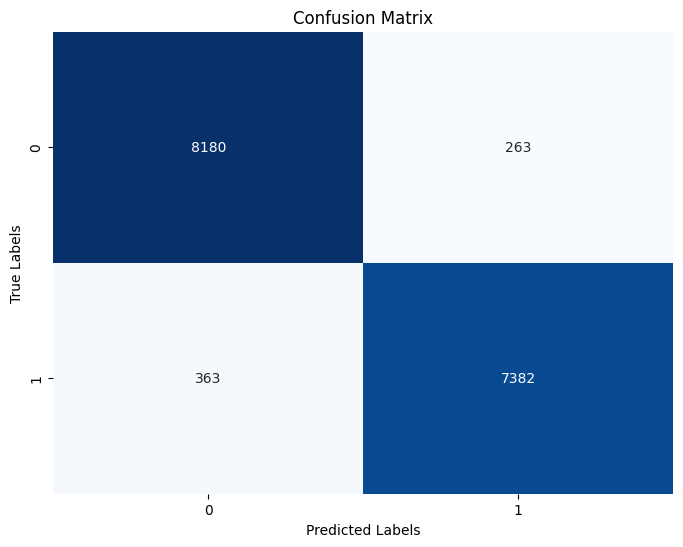

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X = train_data.drop([' Label'], axis=1)
y = train_data[' Label']

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Initialize K-Fold
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store training and test accuracy for each fold
train_accuracies = []
test_accuracies = []

# Lists to store confusion matrices for each fold
conf_matrices = []

# Perform k-fold cross-validation
for fold, (train_index, test_index) in enumerate(kfold.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the Random Forest classifier
    rf_classifier.fit(X_train, y_train)

    # Predict on the training data
    train_pred = rf_classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)

    # Predict on the test data
    test_pred = rf_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, test_pred)
    conf_matrices.append(conf_matrix)

    # Print training and test accuracy for each fold
    print(f"Fold {fold}: Training Accuracy: {train_accuracy * 100:.2f}%, Test Accuracy: {test_accuracy * 100:.2f}%")
    print(f"Confusion Matrix (Fold {fold}):\n{conf_matrix}\n")

# Print the average Training accuracy across all folds
print("Average Training Accuracy: {:.2f}%".format(np.mean(train_accuracies) * 100))
print("Average Training Standard Deviation: {:.2f}%".format(np.std(train_accuracies) * 100))

# Print the average Test  accuracy across all folds
print("Average Test Accuracy: {:.2f}%".format(np.mean(test_accuracies) * 100))
print("Average Test Standard Deviation: {:.2f}%".format(np.std(test_accuracies) * 100))

# Optionally, you can compute and print the overall confusion matrix
overall_conf_matrix = np.sum(conf_matrices, axis=0)
print("Overall Confusion Matrix:\n", overall_conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(overall_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#ROTINA 0
# Assuming 'new_data.csv' is your new dataset
new_data = pd.read_csv('simulation5-modified.csv')

# Preprocess the new dataset (assuming le() function and preprocessing steps are defined)
le(new_data)
new_data.fillna(0, inplace=True)
new_data.replace([np.inf, -np.inf], 0, inplace=True)

# Extract features from the new dataset
X_new = new_data.drop(['Label'], axis=1)  # Assuming 'Label' is the target variable

# Predict using the trained Random Forest model
predictions = rf_classifier.predict(X_new)

# Add predictions to the new dataset
new_data['Predicted_Label'] = predictions

# Save the predictions to a new CSV file
new_data.to_csv('predicted_data.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 99.42%
Standard Deviation: 0.00


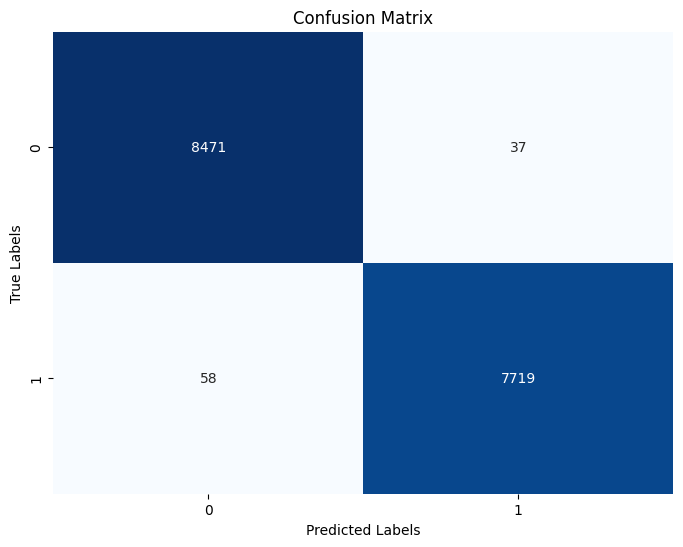

In [ ]:
#ROTINA 0
# Assuming 'new_data.csv' is your new dataset with ground truth labels
new_data_with_truth = pd.read_csv('simulation5-modified.csv')  # Replace 'new_data_with_truth.csv' with the actual file name

# Preprocess the new dataset (assuming le() function and preprocessing steps are defined)
le(new_data_with_truth)
new_data_with_truth.fillna(0, inplace=True)
new_data_with_truth.replace([np.inf, -np.inf], 0, inplace=True)

# Extract features from the new dataset
X_new = new_data_with_truth.drop(['Label'], axis=1)  # Assuming ' Label' is the target variable

# Assuming 'predicted_data.csv' is the file containing the predictions
predicted_data = pd.read_csv('predicted_data.csv')

# Extract ground truth labels from the new dataset
y_true = new_data_with_truth['Label']  # Assuming 'True_Label' is the column containing ground truth labels

# Extract predicted labels from the predicted dataset
y_pred = predicted_data['Predicted_Label']

# Compute accuracy 7 std deviation
accuracy0 = accuracy_score(y_true, y_pred)
std_deviation = np.std(accuracy0)

# Print the accuracy & Std Deviation
print(f'Accuracy: {accuracy0*100:.2f}%')
print(f'Standard Deviation: {std_deviation:.2f}')

confusion = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#ROTINA 1
# Assuming 'new_data.csv' is your new dataset
new_data = pd.read_csv('simulation5-rotina1.csv')

# Preprocess the new dataset (assuming le() function and preprocessing steps are defined)
le(new_data)
new_data.fillna(0, inplace=True)
new_data.replace([np.inf, -np.inf], 0, inplace=True)

# Extract features from the new dataset
X_new = new_data.drop(['Label'], axis=1)  # Assuming 'Label' is the target variable

# Predict using the trained Random Forest model
predictions = rf_classifier.predict(X_new)

# Add predictions to the new dataset
new_data['Predicted_Label'] = predictions

# Save the predictions to a new CSV file
new_data.to_csv('predicted_data1.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 97.24%
Standard Deviation: 0.00


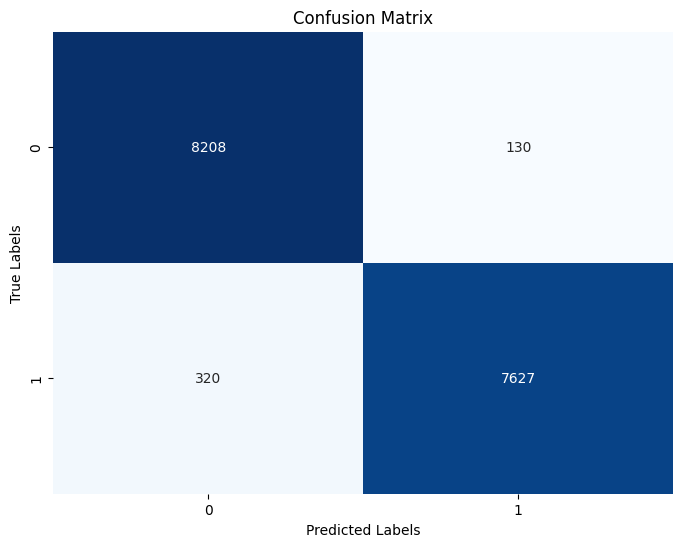

In [ ]:
#ROTINA 1
# Assuming 'new_data.csv' is your new dataset with ground truth labels
new_data_with_truth = pd.read_csv('simulation5-rotina1.csv')  # Replace 'new_data_with_truth.csv' with the actual file name

# Preprocess the new dataset (assuming le() function and preprocessing steps are defined)
le(new_data_with_truth)
new_data_with_truth.fillna(0, inplace=True)
new_data_with_truth.replace([np.inf, -np.inf], 0, inplace=True)

# Extract features from the new dataset
X_new = new_data_with_truth.drop(['Label'], axis=1)  # Assuming ' Label' is the target variable

# Assuming 'predicted_data.csv' is the file containing the predictions
predicted_data = pd.read_csv('predicted_data1.csv')

# Extract ground truth labels from the new dataset
y_true = new_data_with_truth['Label']  # Assuming 'True_Label' is the column containing ground truth labels

# Extract predicted labels from the predicted dataset
y_pred = predicted_data['Predicted_Label']

# Compute accuracy 7 std deviation
accuracy1 = accuracy_score(y_true, y_pred)
std_deviation = np.std(accuracy1)

# Print the accuracy & Std Deviation
print(f'Accuracy: {accuracy1*100:.2f}%')
print(f'Standard Deviation: {std_deviation:.2f}')

confusion = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#ROTINA 2
# Assuming 'new_data.csv' is your new dataset
new_data = pd.read_csv('simulation5-rotina2.csv')

# Preprocess the new dataset (assuming le() function and preprocessing steps are defined)
le(new_data)
new_data.fillna(0, inplace=True)
new_data.replace([np.inf, -np.inf], 0, inplace=True)

# Extract features from the new dataset
X_new = new_data.drop(['Label'], axis=1)  # Assuming 'Label' is the target variable

# Predict using the trained Random Forest model
predictions = rf_classifier.predict(X_new)

# Add predictions to the new dataset
new_data['Predicted_Label'] = predictions

# Save the predictions to a new CSV file
new_data.to_csv('predicted_data2.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 96.01%
Standard Deviation: 0.00


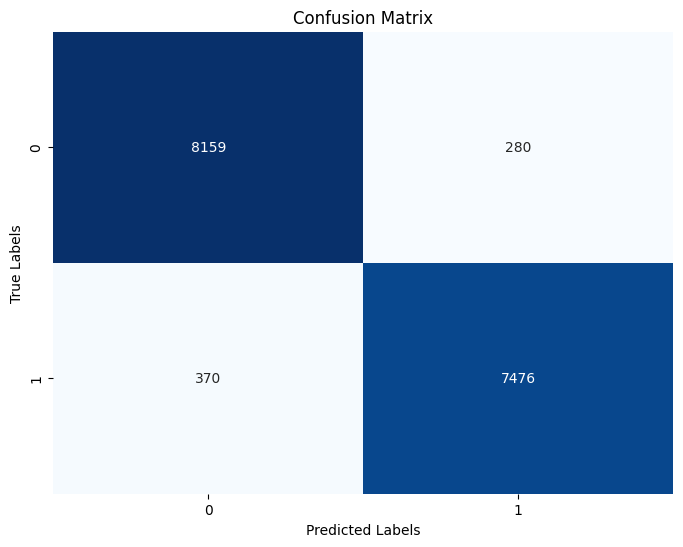

In [ ]:
#rotina 2
# Assuming 'new_data.csv' is your new dataset with ground truth labels
new_data_with_truth = pd.read_csv('simulation5-rotina2.csv')  # Replace 'new_data_with_truth.csv' with the actual file name

# Preprocess the new dataset (assuming le() function and preprocessing steps are defined)
le(new_data_with_truth)
new_data_with_truth.fillna(0, inplace=True)
new_data_with_truth.replace([np.inf, -np.inf], 0, inplace=True)

# Extract features from the new dataset
X_new = new_data_with_truth.drop(['Label'], axis=1)  # Assuming ' Label' is the target variable

# Assuming 'predicted_data.csv' is the file containing the predictions
predicted_data = pd.read_csv('predicted_data2.csv')

# Extract ground truth labels from the new dataset
y_true = new_data_with_truth['Label']  # Assuming 'True_Label' is the column containing ground truth labels

# Extract predicted labels from the predicted dataset
y_pred = predicted_data['Predicted_Label']

# Compute accuracy 7 std deviation
accuracy2 = accuracy_score(y_true, y_pred)
std_deviation = np.std(accuracy2)

# Print the accuracy & Std Deviation
print(f'Accuracy: {accuracy2*100:.2f}%')
print(f'Standard Deviation: {std_deviation:.2f}')

confusion = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#ROTINA 3
# Assuming 'new_data.csv' is your new dataset
new_data = pd.read_csv('simulation5-rotina3.csv')

# Preprocess the new dataset (assuming le() function and preprocessing steps are defined)
le(new_data)
new_data.fillna(0, inplace=True)
new_data.replace([np.inf, -np.inf], 0, inplace=True)

# Extract features from the new dataset
X_new = new_data.drop(['Label'], axis=1)  # Assuming 'Label' is the target variable

# Predict using the trained Random Forest model
predictions = rf_classifier.predict(X_new)

# Add predictions to the new dataset
new_data['Predicted_Label'] = predictions

# Save the predictions to a new CSV file
new_data.to_csv('predicted_data3.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 99.01%
Standard Deviation: 0.00


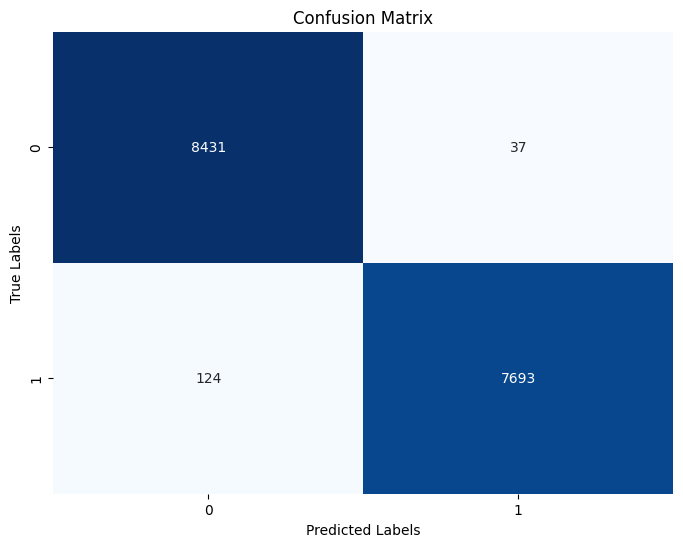

In [ ]:
#rotina 3
# Assuming 'new_data.csv' is your new dataset with ground truth labels
new_data_with_truth = pd.read_csv('simulation5-rotina3.csv')  # Replace 'new_data_with_truth.csv' with the actual file name

# Preprocess the new dataset (assuming le() function and preprocessing steps are defined)
le(new_data_with_truth)
new_data_with_truth.fillna(0, inplace=True)
new_data_with_truth.replace([np.inf, -np.inf], 0, inplace=True)

# Extract features from the new dataset
X_new = new_data_with_truth.drop(['Label'], axis=1)  # Assuming ' Label' is the target variable

# Assuming 'predicted_data.csv' is the file containing the predictions
predicted_data = pd.read_csv('predicted_data3.csv')

# Extract ground truth labels from the new dataset
y_true = new_data_with_truth['Label']  # Assuming 'True_Label' is the column containing ground truth labels

# Extract predicted labels from the predicted dataset
y_pred = predicted_data['Predicted_Label']

# Compute accuracy 7 std deviation
accuracy3 = accuracy_score(y_true, y_pred)
std_deviation = np.std(accuracy3)

# Print the accuracy & Std Deviation
print(f'Accuracy: {accuracy3*100:.2f}%')
print(f'Standard Deviation: {std_deviation:.2f}')

confusion = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#ROTINA 4
# Assuming 'new_data.csv' is your new dataset
new_data = pd.read_csv('simulation5-rotina4.csv')

# Preprocess the new dataset (assuming le() function and preprocessing steps are defined)
le(new_data)
new_data.fillna(0, inplace=True)
new_data.replace([np.inf, -np.inf], 0, inplace=True)

# Extract features from the new dataset
X_new = new_data.drop(['Label'], axis=1)  # Assuming 'Label' is the target variable

# Predict using the trained Random Forest model
predictions = rf_classifier.predict(X_new)

# Add predictions to the new dataset
new_data['Predicted_Label'] = predictions

# Save the predictions to a new CSV file
new_data.to_csv('predicted_data4.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 98.45%
Standard Deviation: 0.00


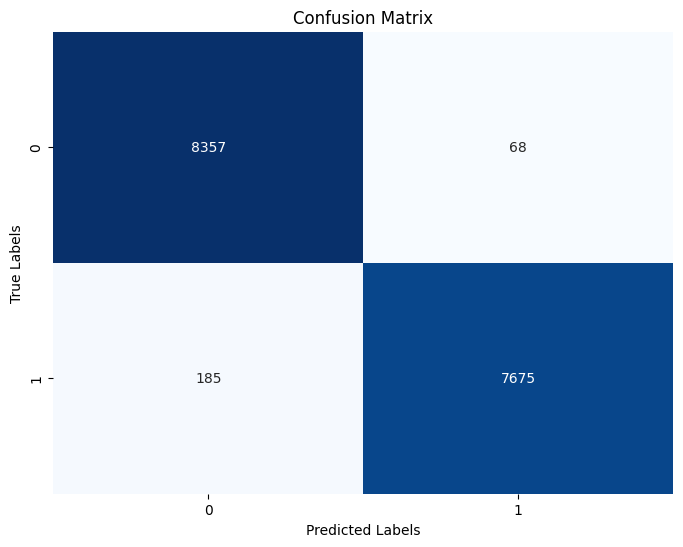

In [ ]:
#rotina 4
# Assuming 'new_data.csv' is your new dataset with ground truth labels
new_data_with_truth = pd.read_csv('simulation5-rotina4.csv')  # Replace 'new_data_with_truth.csv' with the actual file name

# Preprocess the new dataset (assuming le() function and preprocessing steps are defined)
le(new_data_with_truth)
new_data_with_truth.fillna(0, inplace=True)
new_data_with_truth.replace([np.inf, -np.inf], 0, inplace=True)

# Extract features from the new dataset
X_new = new_data_with_truth.drop(['Label'], axis=1)  # Assuming ' Label' is the target variable

# Assuming 'predicted_data.csv' is the file containing the predictions
predicted_data = pd.read_csv('predicted_data4.csv')

# Extract ground truth labels from the new dataset
y_true = new_data_with_truth['Label']  # Assuming 'True_Label' is the column containing ground truth labels

# Extract predicted labels from the predicted dataset
y_pred = predicted_data['Predicted_Label']

# Compute accuracy 7 std deviation
accuracy4 = accuracy_score(y_true, y_pred)
std_deviation = np.std(accuracy4)

# Print the accuracy & Std Deviation
print(f'Accuracy: {accuracy4*100:.2f}%')
print(f'Standard Deviation: {std_deviation:.2f}')

confusion = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#ROTINA 5
# Assuming 'new_data.csv' is your new dataset
new_data = pd.read_csv('simulation5-rotina5.csv')

# Preprocess the new dataset (assuming le() function and preprocessing steps are defined)
le(new_data)
new_data.fillna(0, inplace=True)
new_data.replace([np.inf, -np.inf], 0, inplace=True)

# Extract features from the new dataset
X_new = new_data.drop(['Label'], axis=1)  # Assuming 'Label' is the target variable

# Predict using the trained Random Forest model
predictions = rf_classifier.predict(X_new)

# Add predictions to the new dataset
new_data['Predicted_Label'] = predictions

# Save the predictions to a new CSV file
new_data.to_csv('predicted_data5.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 50.63%
Standard Deviation: 0.00


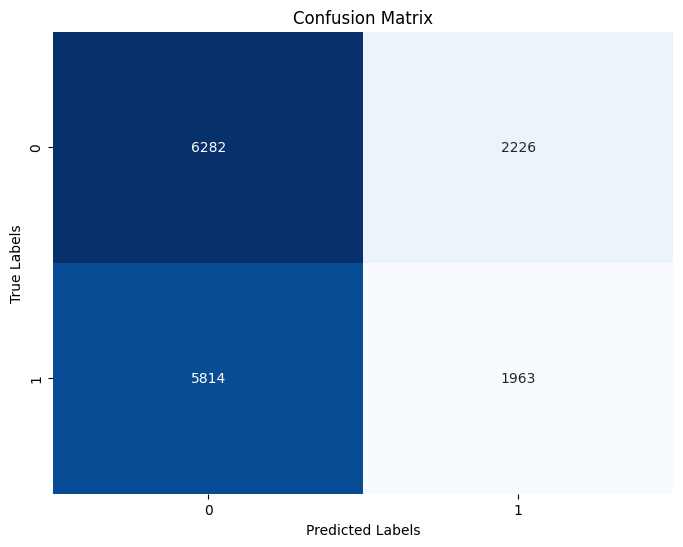

In [ ]:
#rotina 5
# Assuming 'new_data.csv' is your new dataset with ground truth labels
new_data_with_truth = pd.read_csv('simulation5-rotina5.csv')  # Replace 'new_data_with_truth.csv' with the actual file name

# Preprocess the new dataset (assuming le() function and preprocessing steps are defined)
le(new_data_with_truth)
new_data_with_truth.fillna(0, inplace=True)
new_data_with_truth.replace([np.inf, -np.inf], 0, inplace=True)

# Extract features from the new dataset
X_new = new_data_with_truth.drop(['Label'], axis=1)  # Assuming ' Label' is the target variable

# Assuming 'predicted_data.csv' is the file containing the predictions
predicted_data = pd.read_csv('predicted_data5.csv')

# Extract ground truth labels from the new dataset
y_true = new_data_with_truth['Label']  # Assuming 'True_Label' is the column containing ground truth labels

# Extract predicted labels from the predicted dataset
y_pred = predicted_data['Predicted_Label']

# Compute accuracy 7 std deviation
accuracy5 = accuracy_score(y_true, y_pred)
std_deviation = np.std(accuracy5)

# Print the accuracy & Std Deviation
print(f'Accuracy: {accuracy5*100:.2f}%')
print(f'Standard Deviation: {std_deviation:.2f}')

confusion = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#ROTINA 6
# Assuming 'new_data.csv' is your new dataset
new_data = pd.read_csv('simulation5-rotina6.csv')

# Preprocess the new dataset (assuming le() function and preprocessing steps are defined)
le(new_data)
new_data.fillna(0, inplace=True)
new_data.replace([np.inf, -np.inf], 0, inplace=True)

# Extract features from the new dataset
X_new = new_data.drop(['Label'], axis=1)  # Assuming 'Label' is the target variable

# Predict using the trained Random Forest model
predictions = rf_classifier.predict(X_new)

# Add predictions to the new dataset
new_data['Predicted_Label'] = predictions

# Save the predictions to a new CSV file
new_data.to_csv('predicted_data6.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 77.14%
Standard Deviation: 0.00


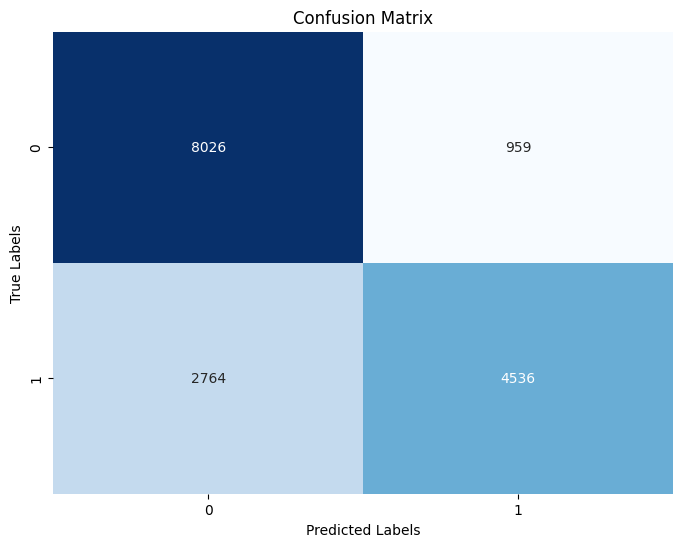

In [ ]:
#rotina 6
# Assuming 'new_data.csv' is your new dataset with ground truth labels
new_data_with_truth = pd.read_csv('simulation5-rotina6.csv')  # Replace 'new_data_with_truth.csv' with the actual file name

# Preprocess the new dataset (assuming le() function and preprocessing steps are defined)
le(new_data_with_truth)
new_data_with_truth.fillna(0, inplace=True)
new_data_with_truth.replace([np.inf, -np.inf], 0, inplace=True)

# Extract features from the new dataset
X_new = new_data_with_truth.drop(['Label'], axis=1)  # Assuming ' Label' is the target variable

# Assuming 'predicted_data.csv' is the file containing the predictions
predicted_data = pd.read_csv('predicted_data6.csv')

# Extract ground truth labels from the new dataset
y_true = new_data_with_truth['Label']  # Assuming 'True_Label' is the column containing ground truth labels

# Extract predicted labels from the predicted dataset
y_pred = predicted_data['Predicted_Label']

# Compute accuracy 7 std deviation
accuracy6 = accuracy_score(y_true, y_pred)
std_deviation = np.std(accuracy6)

# Print the accuracy & Std Deviation
print(f'Accuracy: {accuracy6*100:.2f}%')
print(f'Standard Deviation: {std_deviation:.2f}')

confusion = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#rotina 7 - rotina 10 da tabela da dissertação
# Assuming 'new_data.csv' is your new dataset
new_data = pd.read_csv('simulation5-rotina88.csv')

# Preprocess the new dataset (assuming le() function and preprocessing steps are defined)
le(new_data)
new_data.fillna(0, inplace=True)
new_data.replace([np.inf, -np.inf], 0, inplace=True)

# Extract features from the new dataset
X_new = new_data.drop(['Label'], axis=1)  # Assuming 'Label' is the target variable

# Predict using the trained Random Forest model
predictions = rf_classifier.predict(X_new)

# Add predictions to the new dataset
new_data['Predicted_Label'] = predictions

# Save the predictions to a new CSV file
new_data.to_csv('predicted_data88.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 94.44%
Standard Deviation: 0.00


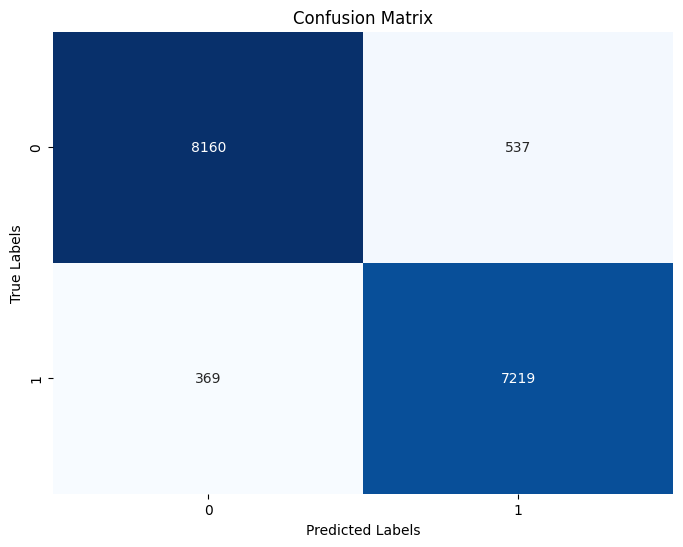

In [ ]:
#rotina 7 - rotina 10 da tabela da dissertação
# Assuming 'new_data.csv' is your new dataset with ground truth labels
new_data_with_truth = pd.read_csv('simulation5-rotina88.csv')  # Replace 'new_data_with_truth.csv' with the actual file name

# Preprocess the new dataset (assuming le() function and preprocessing steps are defined)
le(new_data_with_truth)
new_data_with_truth.fillna(0, inplace=True)
new_data_with_truth.replace([np.inf, -np.inf], 0, inplace=True)

# Extract features from the new dataset
X_new = new_data_with_truth.drop(['Label'], axis=1)  # Assuming ' Label' is the target variable

# Assuming 'predicted_data.csv' is the file containing the predictions
predicted_data = pd.read_csv('predicted_data88.csv')

# Extract ground truth labels from the new dataset
y_true = new_data_with_truth['Label']  # Assuming 'True_Label' is the column containing ground truth labels

# Extract predicted labels from the predicted dataset
y_pred = predicted_data['Predicted_Label']

# Compute accuracy 7 std deviation
accuracy7 = accuracy_score(y_true, y_pred)
std_deviation = np.std(accuracy7)

# Print the accuracy & Std Deviation
print(f'Accuracy: {accuracy7*100:.2f}%')
print(f'Standard Deviation: {std_deviation:.2f}')

confusion = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#ROTINA 8 - rotina 9 da tabela da dissertação
# Assuming 'new_data.csv' is your new dataset
new_data = pd.read_csv('simulation5-rotina99.csv')

# Preprocess the new dataset (assuming le() function and preprocessing steps are defined)
le(new_data)
new_data.fillna(0, inplace=True)
new_data.replace([np.inf, -np.inf], 0, inplace=True)

# Extract features from the new dataset
X_new = new_data.drop(['Label'], axis=1)  # Assuming 'Label' is the target variable

# Predict using the trained Random Forest model
predictions = rf_classifier.predict(X_new)

# Add predictions to the new dataset
new_data['Predicted_Label'] = predictions

# Save the predictions to a new CSV file
new_data.to_csv('predicted_data99.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 93.95%
Standard Deviation: 0.00


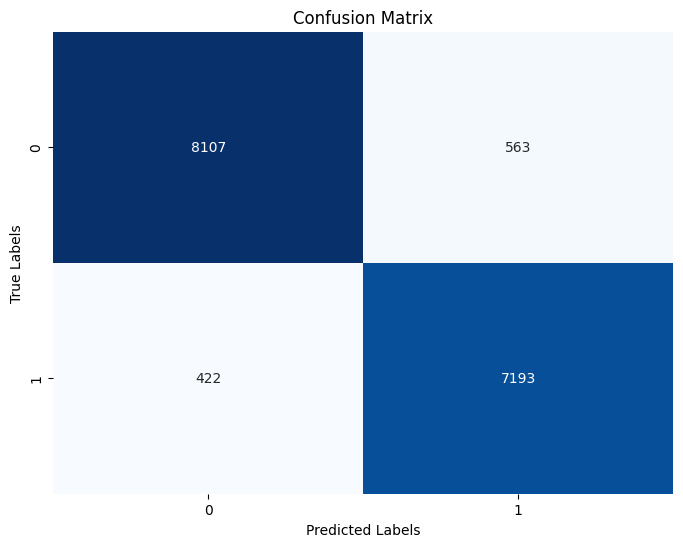

In [ ]:
#ROTINA 8 - rotina 9 da tabela da dissertação
# Assuming 'new_data.csv' is your new dataset with ground truth labels
new_data_with_truth = pd.read_csv('simulation5-rotina99.csv')  # Replace 'new_data_with_truth.csv' with the actual file name

# Preprocess the new dataset (assuming le() function and preprocessing steps are defined)
le(new_data_with_truth)
new_data_with_truth.fillna(0, inplace=True)
new_data_with_truth.replace([np.inf, -np.inf], 0, inplace=True)

# Extract features from the new dataset
X_new = new_data_with_truth.drop(['Label'], axis=1)  # Assuming ' Label' is the target variable

# Assuming 'predicted_data.csv' is the file containing the predictions
predicted_data = pd.read_csv('predicted_data99.csv')

# Extract ground truth labels from the new dataset
y_true = new_data_with_truth['Label']  # Assuming 'True_Label' is the column containing ground truth labels

# Extract predicted labels from the predicted dataset
y_pred = predicted_data['Predicted_Label']

# Compute accuracy 7 std deviation
accuracy8 = accuracy_score(y_true, y_pred)
std_deviation = np.std(accuracy8)

# Print the accuracy & Std Deviation
print(f'Accuracy: {accuracy8*100:.2f}%')
print(f'Standard Deviation: {std_deviation:.2f}')

confusion = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#ROTINA 9
# Assuming 'new_data.csv' is your new dataset
new_data = pd.read_csv('simulation5-rotina9.csv')

# Preprocess the new dataset (assuming le() function and preprocessing steps are defined)
le(new_data)
new_data.fillna(0, inplace=True)
new_data.replace([np.inf, -np.inf], 0, inplace=True)

# Extract features from the new dataset
X_new = new_data.drop(['label'], axis=1)  # Assuming 'Label' is the target variable

# Predict using the trained Random Forest model
predictions = rf_classifier.predict(X_new)

# Add predictions to the new dataset
new_data['Predicted_Label'] = predictions

# Save the predictions to a new CSV file
new_data.to_csv('predicted_data9.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 52.50%
Standard Deviation: 0.00


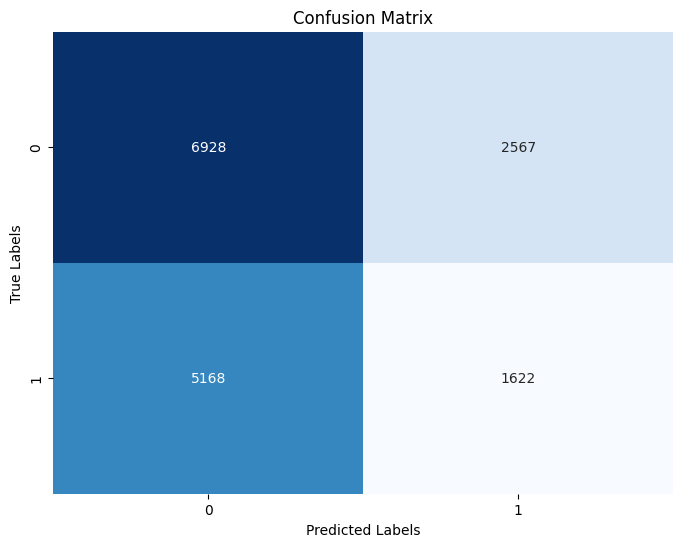

In [ ]:
#rotina 9
# Assuming 'new_data.csv' is your new dataset with ground truth labels
new_data_with_truth = pd.read_csv('simulation5-rotina9.csv')  # Replace 'new_data_with_truth.csv' with the actual file name

# Preprocess the new dataset (assuming le() function and preprocessing steps are defined)
le(new_data_with_truth)
new_data_with_truth.fillna(0, inplace=True)
new_data_with_truth.replace([np.inf, -np.inf], 0, inplace=True)

# Extract features from the new dataset
X_new = new_data_with_truth.drop(['label'], axis=1)  # Assuming ' Label' is the target variable

# Assuming 'predicted_data.csv' is the file containing the predictions
predicted_data = pd.read_csv('predicted_data9.csv')

# Extract ground truth labels from the new dataset
y_true = new_data_with_truth['label']  # Assuming 'True_Label' is the column containing ground truth labels

# Extract predicted labels from the predicted dataset
y_pred = predicted_data['Predicted_Label']

# Compute accuracy 7 std deviation
accuracy9 = accuracy_score(y_true, y_pred)
std_deviation = np.std(accuracy8)

# Print the accuracy & Std Deviation
print(f'Accuracy: {accuracy9*100:.2f}%')
print(f'Standard Deviation: {std_deviation:.2f}')

confusion = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#ROTINA 10 - rotina 8 da tabela da dissertação
# Assuming 'new_data.csv' is your new dataset
new_data = pd.read_csv('simulation5-rotina1010.csv')

# Preprocess the new dataset (assuming le() function and preprocessing steps are defined)
le(new_data)
new_data.fillna(0, inplace=True)
new_data.replace([np.inf, -np.inf], 0, inplace=True)

# Extract features from the new dataset
X_new = new_data.drop(['Label'], axis=1)  # Assuming 'Label' is the target variable

# Predict using the trained Random Forest model
predictions = rf_classifier.predict(X_new)

# Add predictions to the new dataset
new_data['Predicted_Label'] = predictions

# Save the predictions to a new CSV file
new_data.to_csv('predicted_data1010.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 89.98%
Standard Deviation: 0.00


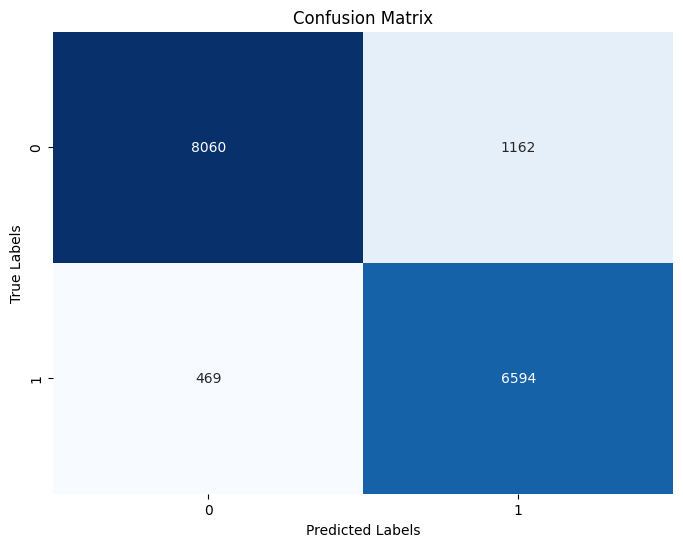

In [ ]:
#rotina 10 - rotina 8 da tabela da dissertação
# Assuming 'new_data.csv' is your new dataset with ground truth labels
new_data_with_truth = pd.read_csv('simulation5-rotina1010.csv')  # Replace 'new_data_with_truth.csv' with the actual file name

# Preprocess the new dataset (assuming le() function and preprocessing steps are defined)
le(new_data_with_truth)
new_data_with_truth.fillna(0, inplace=True)
new_data_with_truth.replace([np.inf, -np.inf], 0, inplace=True)

# Extract features from the new dataset
X_new = new_data_with_truth.drop(['Label'], axis=1)  # Assuming ' Label' is the target variable

# Assuming 'predicted_data.csv' is the file containing the predictions
predicted_data = pd.read_csv('predicted_data1010.csv')

# Extract ground truth labels from the new dataset
y_true = new_data_with_truth['Label']  # Assuming 'True_Label' is the column containing ground truth labels

# Extract predicted labels from the predicted dataset
y_pred = predicted_data['Predicted_Label']

# Compute accuracy 7 std deviation
accuracy10 = accuracy_score(y_true, y_pred)
std_deviation = np.std(accuracy10)

# Print the accuracy & Std Deviation
print(f'Accuracy: {accuracy10*100:.2f}%')
print(f'Standard Deviation: {std_deviation:.2f}')

confusion = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#CALCULO FINAL DA MÉDIA DAS ACURÁCIAS E DESVIO PADRÃO
import numpy as np

# List of accuracies
accuracies = [accuracy0, accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6, accuracy7, accuracy8, accuracy10]

# Calculate average accuracy
average_accuracy = np.mean(accuracies)

# Calculate standard deviation
std_deviation = np.std(accuracies)

print("Average accuracy:", average_accuracy)
print("Standard deviation:", std_deviation)
print(f'Average Accuracy: {average_accuracy*100:.3f}%')
print(f'Standard Deviation: {std_deviation:.4f}')


Average accuracy: 0.8962603622965919
Standard deviation: 0.14418927108442228
Average Accuracy: 89.626%
Standard Deviation: 0.1442
